### Authorship Identifier preprocessing

##### Author : Mohlatlego Nakeng, Scientist Data (University of Pretoria, MIT-Big Data)

We aim to build a model that predicts the author of the news feeds or posts from the social media platforms.

In this notebook, we will explore the features given in the dataset.


Import the modules required

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
# Load packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import string
import spacy
import re
from spacy.lang.en import English
# spacy.load("en_core_web_sm")
parser = English()
import warnings
warnings.filterwarnings('ignore')

### Inserting dataset

In [3]:
data = pd.read_csv("data/Authorship.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'time_stamp', 'raw_text', 'username', 'syllables',
       'periods', 'hyphens', 'commas', 'exclamations', 'questions', 'quotes',
       'dollars', 'percentages', 'ands', 'asterisks', 'pluses', 'equals',
       'slashes', 'hashes', 'replies', 'retweets', 'links', 'smiles',
       'bigsmiles', 'winks', 'bigwinks', 'unsures', 'semicolons', 'hashtags'],
      dtype='object')

In [5]:
del data['Unnamed: 0']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63019 entries, 0 to 63018
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_stamp    63018 non-null  object
 1   raw_text      63019 non-null  object
 2   username      63015 non-null  object
 3   syllables     63019 non-null  int64 
 4   periods       63019 non-null  int64 
 5   hyphens       63019 non-null  int64 
 6   commas        63019 non-null  int64 
 7   exclamations  63019 non-null  int64 
 8   questions     63019 non-null  int64 
 9   quotes        63019 non-null  int64 
 10  dollars       63019 non-null  int64 
 11  percentages   63019 non-null  int64 
 12  ands          63019 non-null  int64 
 13  asterisks     63019 non-null  int64 
 14  pluses        63019 non-null  int64 
 15  equals        63019 non-null  int64 
 16  slashes       63019 non-null  int64 
 17  hashes        63019 non-null  int64 
 18  replies       63019 non-null  int64 
 19  retw

In [7]:
data['username'] =data['username'].fillna("UnKnown")

In [71]:
print( "number of authors:", data['username'].nunique())

number of authors: 22


In [9]:
data['username'].value_counts()

 uplifting          3246
 triangleDAYS       3246
 AlresfordBear      3226
 0laotan            3222
 TAKEBACKOCH        3216
 vsurywanshi87      3213
 vousmevoyez        3208
 XylariaVG          3200
 alanalanae         3199
 watt               3195
 9jatrendstarter    3186
 snash883           3179
 Alekiesui          3173
 alxsleazy          3168
 violet             3168
 AllAboutCaity      3142
 yungbbygirlhoks    3124
 IncrediblePeeps    2520
 AlmaLizzR          2397
 Trinahenk75        2256
 Watswidthename     1383
 tia                 148
UnKnown                4
Name: username, dtype: int64

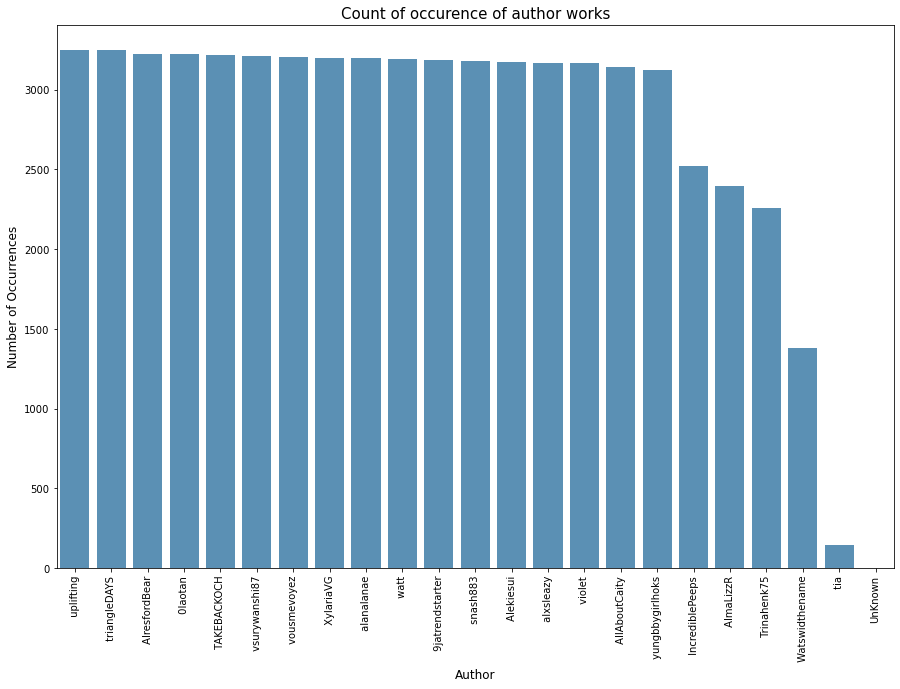

In [10]:
cnt_author = data['username'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(cnt_author.index, cnt_author.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.title('Count of occurence of author works', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
data = data.loc[data["username"]!="UnKnown"]

In [12]:
data

,time_stamp,raw_text,username,syllables,periods,hyphens,commas,exclamations,questions,quotes,...,replies,retweets,links,smiles,bigsmiles,winks,bigwinks,unsures,semicolons,hashtags
0,6/3/2017 14:00,"""RT @vxrnvn: Ma'am",0laotan,2,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,6/3/2017 14:01,"""RT @iAmTerrace: Child &gt; Relationship",0laotan,9,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,6/3/2017 14:04,"""RT @akintonmide: Folks who see keyboard boys...",0laotan,38,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,6/3/2017 14:05,"""RT @iEatFatKidsFood: We all trying to throw ...",0laotan,20,3,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,6/3/2017 14:06,"""Appreciate a pair of nice titties",0laotan,11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63010,7/1/2017 7:09,girls why can't we just get along and love ea...,yungbbygirlhoks,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63011,7/3/2017 0:44,WE SHOULD PAY LESS FOR HEALTHIER FOOD https:/...,yungbbygirlhoks,11,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
63012,7/3/2017 1:14,RT @pettyblackgirI: if more men got their ass...,yungbbygirlhoks,37,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
63013,7/3/2017 1:14,RT @datassque: I was allowed to live there ht...,yungbbygirlhoks,16,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [13]:
big_data = data["raw_text"].tolist()

In [14]:
big_data

[' "RT @vxrnvn: Ma\'am',
 ' "RT @iAmTerrace: Child &gt; Relationship',
 ' "RT @akintonmide: Folks who see keyboard boys and wish to be like them also need to be aware of consequences. Nobody is chasing you',
 ' "RT @iEatFatKidsFood: We all trying to throw DMs the same way Floyd Mayweather throws punches...',
 ' "Appreciate a pair of nice titties',
 " RT @TrendsOfNigeria: Scientists at Redeemer's University have built test kits that can detect Ebola and Lassa virus in 10 mins. It has been…",
 ' "son',
 ' "RT @jackdre02: Bro',
 ' "RT @iAmTerrace: ""How dare a man not sign over all his rights to a child everybody knows is mine and \'should\' be his"" mental illness https:/…"',
 " RT @NawRob: And we know other men are fucking them.. that's the point of the DNA test genius https://t.co/oy1uHi9Iob",
 ' me nutting in her means no one else can get her pregnant? okay. https://t.co/IWXBaHbt4p',
 ' "RT @NawRob: Ain\'t this what y\'all do with ""good men"" and say being a good man doesn\'t mean yo

In [15]:
len(big_data)

63015

We have about 63015 writing pieces from diffrent authors.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63015 entries, 0 to 63014
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_stamp    63014 non-null  object
 1   raw_text      63015 non-null  object
 2   username      63015 non-null  object
 3   syllables     63015 non-null  int64 
 4   periods       63015 non-null  int64 
 5   hyphens       63015 non-null  int64 
 6   commas        63015 non-null  int64 
 7   exclamations  63015 non-null  int64 
 8   questions     63015 non-null  int64 
 9   quotes        63015 non-null  int64 
 10  dollars       63015 non-null  int64 
 11  percentages   63015 non-null  int64 
 12  ands          63015 non-null  int64 
 13  asterisks     63015 non-null  int64 
 14  pluses        63015 non-null  int64 
 15  equals        63015 non-null  int64 
 16  slashes       63015 non-null  int64 
 17  hashes        63015 non-null  int64 
 18  replies       63015 non-null  int64 
 19  retw

In [17]:
data.describe(include='all')

,time_stamp,raw_text,username,syllables,periods,hyphens,commas,exclamations,questions,quotes,...,replies,retweets,links,smiles,bigsmiles,winks,bigwinks,unsures,semicolons,hashtags
count,63014,63015,63015,63015.000000,63015.000000,63015.000000,63015.0,63015.000000,63015.000000,63015.000000,...,63015.000000,63015.000000,63015.000000,63015.000000,63015.0,63015.000000,63015.0,63015.000000,63015.000000,63015.000000
unique,40526,61265,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7/1/2017 7:09,"""🔥🔥🔥",uplifting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,46,37,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,17.355661,0.950821,0.063334,0.0,0.155106,0.066587,0.464858,...,1.013092,0.567849,0.400190,0.000048,0.0,0.000032,0.0,0.000016,0.046053,0.271888
std,NaN,NaN,NaN,10.165266,1.479639,0.306877,0.0,0.868089,0.498173,1.203867,...,0.968791,0.518207,0.536804,0.006900,0.0,0.005634,0.0,0.003984,0.297106,0.943333
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,9.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,15.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,25.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


### Data Cleaning

#### Analysis of missing values

In [18]:
nulls=data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
  if row[0]>0:
    print(index, row[0])

time_stamp 1


In [19]:
# Counting null values from the  dataset
null_dict={}
nulls_all=data.isnull().sum().to_frame()
for index, row in nulls_all.iterrows():
  if row[0]>0:
    #print(index, row[0])
    null_dict[index]=row[0]

In [20]:
nulls_frame = pd.DataFrame(null_dict.items(),columns=['tweet_head','nul'])

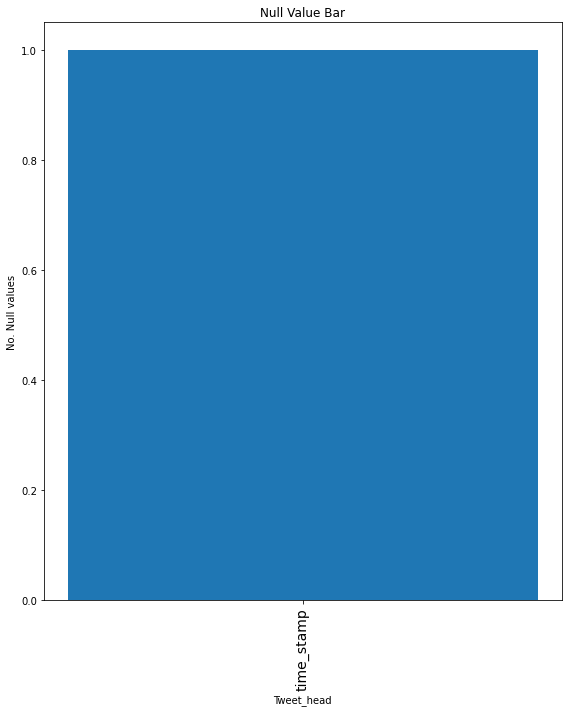

In [21]:
#plot bar graph of the null values
ax = plt.subplots(figsize=(8,10))
plt.bar(nulls_frame['tweet_head'], nulls_frame['nul'])
plt.xlabel('Tweet_head')
plt.ylabel('No. Null values')
plt.xticks(rotation=90,fontsize = 14)
plt.title('Null Value Bar')
plt.tight_layout()
plt.show()

In [22]:
data.columns

Index(['time_stamp', 'raw_text', 'username', 'syllables', 'periods', 'hyphens',
       'commas', 'exclamations', 'questions', 'quotes', 'dollars',
       'percentages', 'ands', 'asterisks', 'pluses', 'equals', 'slashes',
       'hashes', 'replies', 'retweets', 'links', 'smiles', 'bigsmiles',
       'winks', 'bigwinks', 'unsures', 'semicolons', 'hashtags'],
      dtype='object')

#### Identfying columns with >80% missing values

In [23]:
nulls_frame['nul_perc']= (nulls_frame['nul']/len(data['raw_text']))*100 # convert sum of null values into %
nul_col=[] # To store  columns name
nul_percent=[] # To store percentages

for i,j in zip(nulls_frame['nul_perc'],nulls_frame['tweet_head']):
    if i>=75: 
        nul_col.append(j)
        nul_percent.append(i)
        del data_heading[j]

R_col = {'>80%_Nul_ColName':nul_col,'>80%_Percentage':nul_percent}
removed_col=pd.DataFrame(R_col) # data frame of Remove colums

In [24]:
removed_col

,>80%_Nul_ColName,>80%_Percentage


### Identifying variability in the columns:

In [25]:
data.var()

syllables       103.332639
periods           2.189332
hyphens           0.094173
commas            0.000000
exclamations      0.753578
questions         0.248177
quotes            1.449296
dollars           0.006231
percentages       0.004463
ands              0.000000
asterisks         0.039802
pluses            0.004908
equals            0.016847
slashes           2.560901
hashes            0.889878
replies           0.938556
retweets          0.268538
links             0.288158
smiles            0.000048
bigsmiles         0.000000
winks             0.000032
bigwinks          0.000000
unsures           0.000016
semicolons        0.088272
hashtags          0.889878
dtype: float64

In [26]:
df_var=data.var()

In [27]:
df_var

syllables       103.332639
periods           2.189332
hyphens           0.094173
commas            0.000000
exclamations      0.753578
questions         0.248177
quotes            1.449296
dollars           0.006231
percentages       0.004463
ands              0.000000
asterisks         0.039802
pluses            0.004908
equals            0.016847
slashes           2.560901
hashes            0.889878
replies           0.938556
retweets          0.268538
links             0.288158
smiles            0.000048
bigsmiles         0.000000
winks             0.000032
bigwinks          0.000000
unsures           0.000016
semicolons        0.088272
hashtags          0.889878
dtype: float64

In [28]:
var_0=df_var < 0.00000001

In [29]:
var_list=var_0.tolist()
#print(np.where(var_list);0
index_var=np.where(var_list)[0]

index_to_remove=index_var.tolist()
 
list_col_to_remove=[]

columns= data.columns.tolist()

for i in index_to_remove:
    add=columns[i]
    list_col_to_remove.append(add)
    
list_col_to_remove

['syllables', 'quotes', 'retweets', 'smiles']

In [30]:
#Drop the columns
data =data.drop(list_col_to_remove, axis=1)

In [31]:
data.columns

Index(['time_stamp', 'raw_text', 'username', 'periods', 'hyphens', 'commas',
       'exclamations', 'questions', 'dollars', 'percentages', 'ands',
       'asterisks', 'pluses', 'equals', 'slashes', 'hashes', 'replies',
       'links', 'bigsmiles', 'winks', 'bigwinks', 'unsures', 'semicolons',
       'hashtags'],
      dtype='object')

### Looking if data has no duplicate entries:

In [32]:
df = []
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
    new_df = df.append(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)))
else:
    print("No duplicated entries found")

No. of duplicated entries:  154
            time_stamp                                           raw_text  \
24982  12/1/2015 17:00   "RT @CuriouserEdit: Congratulations to all th...   
24983  12/1/2015 17:00   "RT @CuriouserEdit: Congratulations to all th...   
49188  4/19/2017 13:42   "Barkha and Rajdeep badly waiting for stateme...   
49189  4/19/2017 13:42   "Barkha and Rajdeep badly waiting for stateme...   
49697   5/1/2017 13:07               "@narendramodi If Modi takes revenge   

               username  periods  hyphens  commas  exclamations  questions  \
24982   IncrediblePeeps        0        0       0             1          0   
24983   IncrediblePeeps        0        0       0             1          0   
49188     vsurywanshi87        1        0       0             0          0   
49189     vsurywanshi87        1        0       0             0          0   
49697     vsurywanshi87        0        0       0             0          0   

       dollars  percentages  ...  sl

In [33]:
print(data)

           time_stamp                                           raw_text  \
0      6/3/2017 14:00                                 "RT @vxrnvn: Ma'am   
1      6/3/2017 14:01           "RT @iAmTerrace: Child &gt; Relationship   
2      6/3/2017 14:04   "RT @akintonmide: Folks who see keyboard boys...   
3      6/3/2017 14:05   "RT @iEatFatKidsFood: We all trying to throw ...   
4      6/3/2017 14:06                 "Appreciate a pair of nice titties   
...               ...                                                ...   
63010   7/1/2017 7:09   girls why can't we just get along and love ea...   
63011   7/3/2017 0:44   WE SHOULD PAY LESS FOR HEALTHIER FOOD https:/...   
63012   7/3/2017 1:14   RT @pettyblackgirI: if more men got their ass...   
63013   7/3/2017 1:14   RT @datassque: I was allowed to live there ht...   
63014   7/3/2017 3:37   RT @ariyanaparker: I wanna get off this islan...   

               username  periods  hyphens  commas  exclamations  questions  \
0        

### data cleaning

In [34]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [35]:
# Remove URLs
data['clean_text'] = data['raw_text'].apply(remove_url)

In [36]:
data.raw_text

0                                       "RT @vxrnvn: Ma'am
1                 "RT @iAmTerrace: Child &gt; Relationship
2         "RT @akintonmide: Folks who see keyboard boys...
3         "RT @iEatFatKidsFood: We all trying to throw ...
4                       "Appreciate a pair of nice titties
                               ...                        
63010     girls why can't we just get along and love ea...
63011     WE SHOULD PAY LESS FOR HEALTHIER FOOD https:/...
63012     RT @pettyblackgirI: if more men got their ass...
63013     RT @datassque: I was allowed to live there ht...
63014     RT @ariyanaparker: I wanna get off this islan...
Name: raw_text, Length: 63015, dtype: object

In [37]:
data.clean_text

0                                           RT vxrnvn Maam
1                      RT iAmTerrace Child gt Relationship
2        RT akintonmide Folks who see keyboard boys and...
3        RT iEatFatKidsFood We all trying to throw DMs ...
4                        Appreciate a pair of nice titties
                               ...                        
63010    girls why cant we just get along and love each...
63011                WE SHOULD PAY LESS FOR HEALTHIER FOOD
63012    RT pettyblackgirI if more men got their asses ...
63013             RT datassque I was allowed to live there
63014    RT ariyanaparker I wanna get off this island s...
Name: clean_text, Length: 63015, dtype: object

In [40]:
new_df = data[['clean_text', 'username', 'periods', 'hyphens', 'commas',
       'exclamations', 'questions', 'dollars', 'percentages', 'ands',
       'asterisks', 'pluses', 'equals', 'slashes', 'hashes', 'replies',
       'links', 'bigsmiles', 'winks', 'bigwinks', 'unsures', 'semicolons',
       'hashtags']]

In [41]:
new_df

,clean_text,username,periods,hyphens,commas,exclamations,questions,dollars,percentages,ands,...,slashes,hashes,replies,links,bigsmiles,winks,bigwinks,unsures,semicolons,hashtags
0,RT vxrnvn Maam,0laotan,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,RT iAmTerrace Child gt Relationship,0laotan,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,RT akintonmide Folks who see keyboard boys and...,0laotan,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,RT iEatFatKidsFood We all trying to throw DMs ...,0laotan,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Appreciate a pair of nice titties,0laotan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63010,girls why cant we just get along and love each...,yungbbygirlhoks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63011,WE SHOULD PAY LESS FOR HEALTHIER FOOD,yungbbygirlhoks,1,0,0,0,0,0,0,0,...,3,0,0,1,0,0,0,0,0,0
63012,RT pettyblackgirI if more men got their asses ...,yungbbygirlhoks,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
63013,RT datassque I was allowed to live there,yungbbygirlhoks,1,0,0,0,0,0,0,0,...,3,0,1,1,0,0,0,0,0,0


####  Tokenization

In [62]:
def display_topics(model, feature_names, no_top_words):
    
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:", (topic_idx))
        print(" ".join([feature_names[i]
        for i in topic.argsort()[:-no_top_words - 1:-1]]))


def tfidf_vectorizer(text,total_features):

    #  TFIDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(text)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    return tfidf_vectorizer,tfidf,tfidf_feature_names

def count_vectorizer(text,total_features):

    #  Count Vectorizer
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(text)
    tf_feature_names = tf_vectorizer.get_feature_names()
    return tf_vectorizer,tf,tf_feature_names

In [63]:
total_features = 50
num_topic = 20
tfidf_vectorizer, tfidf, tfidf_feature_names = tfidf_vectorizer(new_df['clean_text'],total_features)
tf_vectorizer, tf, tf_feature_names = count_vectorizer(new_df['clean_text'],total_features)

In [64]:
 tfidf_feature_names

['amp',
 'best',
 'better',
 'btsbbmas',
 'btstwt',
 'chelseafc',
 'day',
 'did',
 'dont',
 'fuck',
 'girl',
 'god',
 'going',
 'good',
 'got',
 'happy',
 'im',
 'ive',
 'just',
 'know',
 'life',
 'like',
 'lol',
 'look',
 'love',
 'make',
 'man',
 'miami',
 'nationalparrot',
 'nationalparrotcom',
 'need',
 'new',
 'oh',
 'people',
 'really',
 'right',
 'rt',
 'say',
 'shit',
 'taemin',
 'thats',
 'think',
 'time',
 'today',
 'video',
 'want',
 'way',
 'work',
 'yall',
 'youre']